# <font color='#2E8B57' style='font-size: 30px;'>1. Importar librerias</font>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <font color='#2E8B57' style='font-size: 30px;'>2. Extracción de datos</font>

In [ ]:
datos = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json')

### <font color='#2E8B57' style='font-size: 30px;'>2.1 Conozce el conjunto de datos
</font>

In [ ]:
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
datos.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [ ]:
type(datos['customer'].iloc[0])

dict

In [ ]:
customer_df = pd.json_normalize(datos['customer'])
customer_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [ ]:
phone_df = pd.json_normalize(datos['phone'])
phone_df.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [ ]:
internet_df = pd.json_normalize(datos['internet'])
internet_df.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [ ]:
datos['account'].iloc[0]

{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

In [ ]:
type(datos['account'])

pandas.core.series.Series

In [ ]:
account_df = pd.json_normalize(datos['account'])
account_df.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
datos['account'].iloc[0]

{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

In [ ]:
datos['customerID'].unique()

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

In [ ]:
# Expandimos cada columna que contiene un diccionario
customer_df = datos['customer'].apply(pd.Series)
phone_df = datos['phone'].apply(pd.Series)
internet_df = datos['internet'].apply(pd.Series)
account_df = datos['account'].apply(pd.Series)

# Combinamos todo con las columnas originales no-anidadas
datos_normalizados = pd.concat([
    datos[['customerID', 'Churn']],  # columnas no anidadas
    customer_df,
    phone_df,
    internet_df,
    account_df
], axis=1)


In [ ]:
datos_normalizados.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"


In [ ]:
datos.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [ ]:
type(datos['customer'].iloc[0])

dict

In [ ]:
customer_df = pd.json_normalize(datos['customer'])
customer_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [ ]:
phone_df = pd.json_normalize(datos['phone'])
phone_df.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [ ]:
internet_df = pd.json_normalize(datos['internet'])
internet_df.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [ ]:
datos['account'].iloc[0]

{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

In [ ]:
type(datos['account'])

pandas.core.series.Series

In [ ]:
account_df = pd.json_normalize(datos['account'])
account_df.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
# Expandimos cada columna que contiene un diccionario
customer_df = datos['customer'].apply(pd.Series)
phone_df = datos['phone'].apply(pd.Series)
internet_df = datos['internet'].apply(pd.Series)
account_df = datos['account'].apply(pd.Series)

In [ ]:
# Expandimos cada columna que contiene un diccionario
customer_df = datos['customer'].apply(pd.Series)
phone_df = datos['phone'].apply(pd.Series)
internet_df = datos['internet'].apply(pd.Series)
account_df = datos['account'].apply(pd.Series)

In [ ]:
datos_normalizados.sample(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
6742,9289-LBQVU,No,Male,0,Yes,No,64,Yes,Yes,DSL,No,Yes,No,Yes,No,Yes,One year,Yes,Mailed check,"{'Monthly': 70.15, 'Total': '4480.7'}"
5358,7318-EIVKO,No,Male,0,No,No,8,Yes,Yes,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,"{'Monthly': 59.25, 'Total': '436.6'}"
5750,7854-FOKSF,Yes,Male,0,No,No,1,No,No phone service,DSL,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,"{'Monthly': 35.9, 'Total': '35.9'}"


In [ ]:
datos_normalizados.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges'],
      dtype='object')

In [ ]:
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7267 non-null   object
 1   Churn             7267 non-null   object
 2   gender            7267 non-null   object
 3   SeniorCitizen     7267 non-null   int64 
 4   Partner           7267 non-null   object
 5   Dependents        7267 non-null   object
 6   tenure            7267 non-null   int64 
 7   PhoneService      7267 non-null   object
 8   MultipleLines     7267 non-null   object
 9   InternetService   7267 non-null   object
 10  OnlineSecurity    7267 non-null   object
 11  OnlineBackup      7267 non-null   object
 12  DeviceProtection  7267 non-null   object
 13  TechSupport       7267 non-null   object
 14  StreamingTV       7267 non-null   object
 15  StreamingMovies   7267 non-null   object
 16  Contract          7267 non-null   object
 17  PaperlessBilli

In [ ]:
datos_normalizados['Charges']

,Charges
0,"{'Monthly': 65.6, 'Total': '593.3'}"
1,"{'Monthly': 59.9, 'Total': '542.4'}"
2,"{'Monthly': 73.9, 'Total': '280.85'}"
3,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,"{'Monthly': 83.9, 'Total': '267.4'}"
...,...
7262,"{'Monthly': 55.15, 'Total': '742.9'}"
7263,"{'Monthly': 85.1, 'Total': '1873.7'}"
7264,"{'Monthly': 50.3, 'Total': '92.75'}"
7265,"{'Monthly': 67.85, 'Total': '4627.65'}"


In [ ]:
Charges_df = datos_normalizados['Charges'].apply(pd.Series)
Charges_df.sample(3)

,Monthly,Total
6341,69.05,1793.25
3952,98.80,3475.55
240,84.90,3067.2


In [ ]:
datosNormalizadosFinal = pd.concat([
    datos_normalizados[['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']], # columnas no anidadas
    Charges_df, #columna anidada
], axis=1)

In [ ]:
datosNormalizadosFinal.sample(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
5105,6979-ZNSFF,Yes,Female,0,No,No,8,Yes,Yes,Fiber optic,...,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,87.05,762.1
4727,6479-OAUSD,No,Male,0,No,No,25,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.90,510.8
6472,8896-BQTTI,No,Male,0,No,No,1,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,25.00,25


In [ ]:
datosNormalizadosFinal

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
datosNormalizadosFinal1 = datosNormalizadosFinal

In [ ]:
datosNormalizadosFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
datosNormalizadosFinal = datosNormalizadosFinal.rename(columns={
    'customerID': 'Id_Cliente',
    'Churn' : 'abandonó_del_servicio',
    'gender': 'género',
    'SeniorCitizen': 'adulto_mayor',
    'Partner': 'estado_civil',
    'Dependents': 'dependientes',
    'tenure': 'meses_permanencia',
    'PhoneService': 'servicio_telefónico',
    'MultipleLines': 'líneas_telefónicas',
    'InternetService': 'servicio_internet',
    'OnlineSecurity': 'seguridad_en_línea',
    'OnlineBackup': 'copia_online',
    'DeviceProtection': 'protección_de_dispositivos',
    'TechSupport': 'soporte_técnico',
    'StreamingTV': 'TV_en_línea',
    'StreamingMovies': 'películas_en_línea',
    'Contract': 'tipo_de_contrato',
    'PaperlessBilling': 'facturación_digital',
    'PaymentMethod': 'método_de_pago',
    'Monthly': 'pagos_mensuales',
    'Total': 'pago_total' })

In [ ]:
datosNormalizadosFinal.columns

Index(['Id_Cliente', 'abandonó_del_servicio', 'género', 'adulto_mayor',
       'estado_civil', 'dependientes', 'meses_permanencia',
       'servicio_telefónico', 'líneas_telefónicas', 'servicio_internet',
       'seguridad_en_línea', 'copia_online', 'protección_de_dispositivos',
       'soporte_técnico', 'TV_en_línea', 'películas_en_línea',
       'tipo_de_contrato', 'facturación_digital', 'método_de_pago',
       'pagos_mensuales', 'pago_total'],
      dtype='object')

In [ ]:
# Verifica si hay valore único en cada columna
for col in datosNormalizadosFinal.columns:
    print(f"{col}: {datosNormalizadosFinal[col].nunique()}")

Id_Cliente: 7267
abandonó_del_servicio: 3
género: 2
adulto_mayor: 2
estado_civil: 2
dependientes: 2
meses_permanencia: 73
servicio_telefónico: 2
líneas_telefónicas: 3
servicio_internet: 3
seguridad_en_línea: 3
copia_online: 3
protección_de_dispositivos: 3
soporte_técnico: 3
TV_en_línea: 3
películas_en_línea: 3
tipo_de_contrato: 3
facturación_digital: 2
método_de_pago: 4
pagos_mensuales: 1585
pago_total: 6531


In [ ]:
# verifica datos nulos
datosNormalizadosFinal.isnull().sum()

,0
Id_Cliente,0
abandonó_del_servicio,0
género,0
adulto_mayor,0
estado_civil,0
dependientes,0
meses_permanencia,0
servicio_telefónico,0
líneas_telefónicas,0
servicio_internet,0


In [ ]:
for col in datosNormalizadosFinal.columns:
    print(f"{col}: {datosNormalizadosFinal[col].duplicated().sum()}")

Id_Cliente: 0
abandonó_del_servicio: 7264
género: 7265
adulto_mayor: 7265
estado_civil: 7265
dependientes: 7265
meses_permanencia: 7194
servicio_telefónico: 7265
líneas_telefónicas: 7264
servicio_internet: 7264
seguridad_en_línea: 7264
copia_online: 7264
protección_de_dispositivos: 7264
soporte_técnico: 7264
TV_en_línea: 7264
películas_en_línea: 7264
tipo_de_contrato: 7264
facturación_digital: 7265
método_de_pago: 7263
pagos_mensuales: 5682
pago_total: 736


### <font color='#2E8B57' style='font-size: 30px;'>2.2 Estandarización y transformación de datos
</font>

In [ ]:
for col in [ 'Id_Cliente',
    'abandonó_del_servicio',
    'género',
    'adulto_mayor',
    'estado_civil',
    'dependientes',
    'meses_permanencia',
    'servicio_telefónico',
    'líneas_telefónicas',
    'servicio_internet',
    'seguridad_en_línea',
    'copia_online',
    'protección_de_dispositivos',
    'soporte_técnico',
    'TV_en_línea',
    'películas_en_línea',
    'tipo_de_contrato',
    'facturación_digital',
    'método_de_pago',
    'pagos_mensuales',
    'pago_total']:
    print(f"Valores de la columna '{col}':")
    print(datosNormalizadosFinal[col].unique())
    print("-" * 20)

Valores de la columna 'Id_Cliente':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------
Valores de la columna 'abandonó_del_servicio':
['No' 'Yes' '']
--------------------
Valores de la columna 'género':
['Female' 'Male']
--------------------
Valores de la columna 'adulto_mayor':
[0 1]
--------------------
Valores de la columna 'estado_civil':
['Yes' 'No']
--------------------
Valores de la columna 'dependientes':
['Yes' 'No']
--------------------
Valores de la columna 'meses_permanencia':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
--------------------
Valores de la columna 'servicio_telefónico':
['Yes' 'No']
--------------------
Valores de la columna 'líneas_telefónicas':
['No' 'Yes' 'No phone service']
--------------------
Valores de la columna 'servici

In [ ]:
datosNormalizadosFinal['Id_Cliente'] = datosNormalizadosFinal['Id_Cliente'].str.strip()
datosNormalizadosFinal['Id_Cliente'] = datosNormalizadosFinal['Id_Cliente'].str.replace(r'\s', '', regex=True)

In [ ]:
# Convierte TODO a string y limpia
datosNormalizadosFinal['Id_Cliente'] = datosNormalizadosFinal['Id_Cliente'].astype(str).str.replace(r'[^a-zA-Z0-9]', '', regex=True)

In [ ]:
datosNormalizadosFinal['Id_Cliente'].sample(7)

,Id_Cliente
5837,7982VCELR
1460,2091GPPIQ
4738,6490FGZAT
4540,6223DHJGV
5373,7338ERIVA
3962,5419CONWX
3476,4815GBTCD


In [ ]:
datosNormalizadosFinal['tipo_de_contrato'] = datosNormalizadosFinal['tipo_de_contrato'].str.lower()
datosNormalizadosFinal['tipo_de_contrato'] = datosNormalizadosFinal['tipo_de_contrato'].str.replace(r'\-', ' ', regex=True).str.strip()

In [ ]:
datosNormalizadosFinal['tipo_de_contrato'].sample(7)

,tipo_de_contrato
5042,month to month
2913,month to month
6388,month to month
2821,two year
233,two year
1966,month to month
338,month to month


In [ ]:
datosNormalizadosFinal['método_de_pago'] = datosNormalizadosFinal['método_de_pago'].str.lower()
datosNormalizadosFinal['método_de_pago'] = datosNormalizadosFinal['método_de_pago'].str.replace(r'\(.*\)', '', regex=True).str.strip()
datosNormalizadosFinal['método_de_pago'] = datosNormalizadosFinal['método_de_pago'].astype(str)

In [ ]:
datosNormalizadosFinal['método_de_pago'].sample(7)

,método_de_pago
1936,credit card
42,mailed check
3745,bank transfer
1820,electronic check
3848,credit card
5189,credit card
6801,credit card


In [ ]:
datosNormalizadosFinal['método_de_pago'] = datosNormalizadosFinal['método_de_pago'].replace(' ', np.nan)
datosNormalizadosFinal['pago_total'] = pd.to_numeric( datosNormalizadosFinal['pago_total'], errors='coerce').fillna(0)
datosNormalizadosFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id_Cliente                  7267 non-null   object 
 1   abandonó_del_servicio       7267 non-null   object 
 2   género                      7267 non-null   object 
 3   adulto_mayor                7267 non-null   int64  
 4   estado_civil                7267 non-null   object 
 5   dependientes                7267 non-null   object 
 6   meses_permanencia           7267 non-null   int64  
 7   servicio_telefónico         7267 non-null   object 
 8   líneas_telefónicas          7267 non-null   object 
 9   servicio_internet           7267 non-null   object 
 10  seguridad_en_línea          7267 non-null   object 
 11  copia_online                7267 non-null   object 
 12  protección_de_dispositivos  7267 non-null   object 
 13  soporte_técnico             7267 

In [ ]:
datosNormalizadosFinal['estado_civil'].sample(7)

,estado_civil
3074,Yes
3691,No
6953,No
6220,No
5786,Yes
361,Yes
2105,Yes


In [ ]:
# (Male/Female/'') → 1/2/3
pd.set_option('future.no_silent_downcasting', True)
datosNormalizadosFinal.loc[:, ['género']] = datosNormalizadosFinal.loc[:, ['género']].replace({'Male': 1, 'Female': 2, '': np.nan})
datosNormalizadosFinal.loc[:,['género']] = datosNormalizadosFinal.loc[:,['género']].fillna(3)
datosNormalizadosFinal[['género']] = datosNormalizadosFinal[['género']].astype(np.int64)

In [ ]:
# (Yes/No/'') → 1/2/3
pd.set_option('future.no_silent_downcasting', True)
categoricos2binarios = ['abandonó_del_servicio','estado_civil', 'dependientes', 'servicio_telefónico',  'facturación_digital']
datosNormalizadosFinal.loc[:,categoricos2binarios] = datosNormalizadosFinal.loc[:,categoricos2binarios].replace({'Yes': 1, 'No': 2, '': np.nan})
datosNormalizadosFinal.loc[:,categoricos2binarios] = datosNormalizadosFinal.loc[:,categoricos2binarios].fillna(3)
datosNormalizadosFinal[categoricos2binarios] = datosNormalizadosFinal[categoricos2binarios].astype(np.int64)

In [ ]:
# (Yes/No/No  internet service/ '') → 1/2/3/4

pd.set_option('future.no_silent_downcasting', True)
categoricos2binarios = ['copia_online','estado_civil', 'protección_de_dispositivos', 'soporte_técnico',  'TV_en_línea', 'películas_en_línea', 'seguridad_en_línea']
datosNormalizadosFinal.loc[:,categoricos2binarios] = datosNormalizadosFinal.loc[:,categoricos2binarios].replace({'Yes': 1, 'No': 2, 'No internet service': 3, '': np.nan})
datosNormalizadosFinal.loc[:,categoricos2binarios] = datosNormalizadosFinal.loc[:,categoricos2binarios].fillna(4)
datosNormalizadosFinal[categoricos2binarios] = datosNormalizadosFinal[categoricos2binarios].astype(np.int64)

In [ ]:
# (Yes/No/No phone service) → 1/2/3/4
pd.set_option('future.no_silent_downcasting', True)
datosNormalizadosFinal.loc[:, ['líneas_telefónicas']] = datosNormalizadosFinal.loc[:, ['líneas_telefónicas']].replace({'Yes': 1, 'No': 2, 'No phone service': 3, '': np.nan})
datosNormalizadosFinal.loc[:,['líneas_telefónicas']] = datosNormalizadosFinal.loc[:,['líneas_telefónicas']].fillna(4)
datosNormalizadosFinal[['líneas_telefónicas']] = datosNormalizadosFinal[['líneas_telefónicas']].astype(np.int64)

In [ ]:
# (DSL/Fiber optic/No/'') → 1/2/3/4
pd.set_option('future.no_silent_downcasting', True)
datosNormalizadosFinal.loc[:, ['servicio_internet']] = datosNormalizadosFinal.loc[:, ['servicio_internet']].replace({'DSL': 1, 'Fiber optic': 2, 'No': 3, '': np.nan})
datosNormalizadosFinal.loc[:,['servicio_internet']] = datosNormalizadosFinal.loc[:,['servicio_internet']].fillna(4)
datosNormalizadosFinal[['servicio_internet']] = datosNormalizadosFinal[['servicio_internet']].astype(np.int64)

In [ ]:
# (month to month/one year/two year/'') → 1/2/3/4
pd.set_option('future.no_silent_downcasting', True)
datosNormalizadosFinal.loc[:, ['tipo_de_contrato']] = datosNormalizadosFinal.loc[:, ['tipo_de_contrato']].replace({'month to month': 1, 'one year': 2, 'two year': 3, '': np.nan})
datosNormalizadosFinal.loc[:,['tipo_de_contrato']] = datosNormalizadosFinal.loc[:,['tipo_de_contrato']].fillna(4)
datosNormalizadosFinal[['tipo_de_contrato']] = datosNormalizadosFinal[['tipo_de_contrato']].astype(np.int64)

In [ ]:
# (Mailed check/Electronic check/Credit card (automatic)/Bank transfer (automatic)/'') → 1/2/3/4/5
pd.set_option('future.no_silent_downcasting', True)
datosNormalizadosFinal.loc[:, ['método_de_pago']] = datosNormalizadosFinal.loc[:, ['método_de_pago']].replace({'mailed check': 1, 'electronic check': 2, 'credit card': 3, 'bank transfer' : 4, '' : np.nan})
datosNormalizadosFinal.loc[:,['método_de_pago']] = datosNormalizadosFinal.loc[:,['método_de_pago']].fillna(5)
datosNormalizadosFinal[['método_de_pago']] = datosNormalizadosFinal[['método_de_pago']].astype(np.int64)

In [ ]:
for col in ['método_de_pago',]:
    print(f"Valores de la columna '{col}':")
    print(datosNormalizadosFinal[col].unique())
    print("-" * 20)

Valores de la columna 'método_de_pago':
[1 2 3 4]
--------------------


In [ ]:
for col in [ 'Id_Cliente',
    'abandonó_del_servicio',
    'género',
    'adulto_mayor',
    'estado_civil',
    'dependientes',
    'meses_permanencia',
    'servicio_telefónico',
    'líneas_telefónicas',
    'servicio_internet',
    'seguridad_en_línea',
    'copia_online',
    'protección_de_dispositivos',
    'soporte_técnico',
    'TV_en_línea',
    'películas_en_línea',
    'tipo_de_contrato',
    'facturación_digital',
    'método_de_pago',
    'pagos_mensuales',
    'pago_total']:
    print(f"Valores de la columna '{col}':")
    print(datosNormalizadosFinal[col].unique())
    print("-" * 20)

Valores de la columna 'Id_Cliente':
['0002ORFBO' '0003MKNFE' '0004TLHLJ' ... '9992UJOEL' '9993LHIEB'
 '9995HOTOH']
--------------------
Valores de la columna 'abandonó_del_servicio':
[2 1 3]
--------------------
Valores de la columna 'género':
[2 1]
--------------------
Valores de la columna 'adulto_mayor':
[0 1]
--------------------
Valores de la columna 'estado_civil':
[1 2]
--------------------
Valores de la columna 'dependientes':
[1 2]
--------------------
Valores de la columna 'meses_permanencia':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
--------------------
Valores de la columna 'servicio_telefónico':
[1 2]
--------------------
Valores de la columna 'líneas_telefónicas':
[2 1 3]
--------------------
Valores de la columna 'servicio_internet':
[1 2 3]
--------------------
Valores de la columna 'seguri

In [ ]:
pd.set_option('future.no_silent_downcasting', True)
datosNormalizadosFinal.loc[:, ['método_de_pago']] = datosNormalizadosFinal.loc[:, ['método_de_pago']].replace({'electronic check': 1, 'credit card': 2, 'mailed check': 3, 'bank transfer': 0})
datosNormalizadosFinal.loc[:,['método_de_pago']] = datosNormalizadosFinal.loc[:,['método_de_pago']].fillna(0)
datosNormalizadosFinal[['método_de_pago']] = datosNormalizadosFinal[['método_de_pago']].astype(np.int64)

In [ ]:
datosNormalizadosFinal.sample(7)

,Id_Cliente,abandonó_del_servicio,género,adulto_mayor,estado_civil,dependientes,meses_permanencia,servicio_telefónico,líneas_telefónicas,servicio_internet,...,copia_online,protección_de_dispositivos,soporte_técnico,TV_en_línea,películas_en_línea,tipo_de_contrato,facturación_digital,método_de_pago,pagos_mensuales,pago_total
1186,1697BCSHV,2,2,0,1,1,58,1,1,1,...,1,2,2,1,2,1,1,4,66.80,3970.40
6319,8695WDYEA,2,1,0,2,2,1,1,2,1,...,2,2,2,2,2,1,2,1,51.25,51.25
4945,6749UTDVX,2,1,0,2,2,72,1,1,2,...,1,1,2,1,1,3,1,2,103.65,7634.80
753,1078TDCRN,2,2,1,1,2,3,2,3,1,...,1,2,2,2,2,1,1,2,30.75,82.85
4143,5680LQOGP,2,2,0,2,2,68,1,2,1,...,1,1,1,1,1,3,1,3,82.45,5646.60
1685,2386OWURY,2,2,0,2,2,58,1,2,2,...,2,2,1,1,1,1,1,2,95.30,5817.70
4508,6176YJWAS,2,1,0,1,2,72,1,1,2,...,1,1,2,1,2,3,1,3,97.95,7114.25


In [ ]:
datosNormalizadosFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id_Cliente                  7267 non-null   object 
 1   abandonó_del_servicio       7267 non-null   int64  
 2   género                      7267 non-null   int64  
 3   adulto_mayor                7267 non-null   int64  
 4   estado_civil                7267 non-null   int64  
 5   dependientes                7267 non-null   int64  
 6   meses_permanencia           7267 non-null   int64  
 7   servicio_telefónico         7267 non-null   int64  
 8   líneas_telefónicas          7267 non-null   int64  
 9   servicio_internet           7267 non-null   int64  
 10  seguridad_en_línea          7267 non-null   int64  
 11  copia_online                7267 non-null   int64  
 12  protección_de_dispositivos  7267 non-null   int64  
 13  soporte_técnico             7267 

# <font color='#2E8B57' style='font-size: 30px;'>3. Transformación</font>

### <font color='#2E8B57' style='font-size: 30px;'>3.1 Análisis Descriptivo</font>

In [ ]:
# Sumar solo los valores 1 en la columna 'abandonó_del_servicio'
totalAbandonos = (datosNormalizadosFinal['abandonó_del_servicio'] == 1).sum()

print("Total de clientes que abandonaron el servicio:", totalAbandonos)

Total de clientes que abandonaron el servicio: 1869


In [ ]:
# Sumar solo los valores 2 en la columna 'abandonó_del_servicio'
totalClientesActivos = ((datosNormalizadosFinal['abandonó_del_servicio'] == 2).sum()
)//2
print("Total de clientes que abandonaron el servicio:", totalClientesActivos)

Total de clientes que abandonaron el servicio: 2587


In [ ]:
# Sumar solo los valores 3 en la columna 'abandonó_del_servicio'
totalClientesSinAnálisis = ((datosNormalizadosFinal['abandonó_del_servicio'] == 3).sum()
)//3
print("Total de clientes que no están en el análisis:", totalClientesSinAnálisis)

Total de clientes que no están en el análisis: 74


### <font color='#81C784' style='font-size: 30px;'>3.2 Distribución de evasión</font>

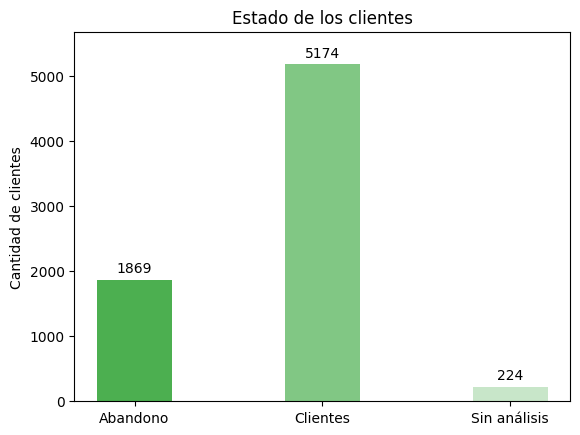

In [ ]:
# Sumar solo los valores 1 en la columna 'abandonó_del_servicio'
totalAbandonos = (datosNormalizadosFinal['abandonó_del_servicio'] == 1).sum()

# Sumar solo los valores 2 en la columna 'abandonó_del_servicio'
totalClientesActivos = ((datosNormalizadosFinal['abandonó_del_servicio'] == 2).sum())

# Sumar solo los valores 3 en la columna 'abandonó_del_servicio'
totalClientesSinAnálisis = ((datosNormalizadosFinal['abandonó_del_servicio'] == 3).sum())

# Datos para el gráfico
categorias = ["Abandono", "Clientes", "Sin análisis"]
valores = [totalAbandonos, totalClientesActivos, totalClientesSinAnálisis]

# Configuración del gráfico
x = np.arange(len(categorias))
width = 0.4

fig, ax = plt.subplots()
rects = ax.bar(x, valores, width, color= ["#4CAF50", "#81C784", "#C8E6C9"])

# Etiquetas encima de las barras
ax.bar_label(rects, padding=3)

# Personalización
ax.set_ylabel('Cantidad de clientes')
ax.set_title('Estado de los clientes')
ax.set_xticks(x)
ax.set_xticklabels(categorias)
ax.set_ylim(0, max(valores) + 500)

# Mostrar gráfico
plt.show()

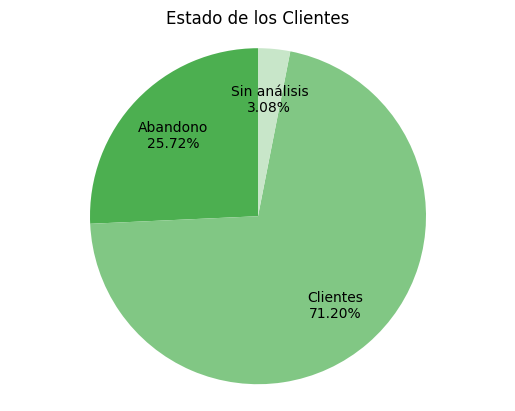

In [ ]:
# Datos para el gráfico
categorias = ["Abandono", "Clientes", "Sin análisis"]
valores = [totalAbandonos, totalClientesActivos, totalClientesSinAnálisis]
colores = ["#4CAF50", "#81C784", "#C8E6C9"]  # Tonos pastel verdes monocromáticos

# Calcular porcentaje de cada categoría
total = sum(valores)
porcentajes = [v / total * 100 for v in valores]

# Crear figura
fig, ax = plt.subplots()

# Crear gráfico de torta sin etiquetas automáticas
wedges, _ = ax.pie(
    valores,
    colors=colores,
    startangle=90,
    labels=[None]*len(categorias),  # No mostrar etiquetas externas
    radius=1,
    wedgeprops=dict(width=1)  # torta normal, no tipo dona
)

# Agregar texto con categoría + porcentaje en cada porción
for i, wedge in enumerate(wedges):
    ang = (wedge.theta2 + wedge.theta1) / 2
    x = 0.7 * np.cos(np.deg2rad(ang))
    y = 0.7 * np.sin(np.deg2rad(ang))
    etiqueta = f"{categorias[i]}\n{porcentajes[i]:.2f}%"
    ax.text(x, y, etiqueta, ha='center', va='center', fontsize=10, color='black')

# Estética
ax.axis('equal')
ax.set_title("Estado de los Clientes", fontsize=12)

# Mostrar gráfico
plt.show()

### <font color='#2E8B57' style='font-size: 30px;'>3.3 Recuento de evasión por variables categóricas
</font>

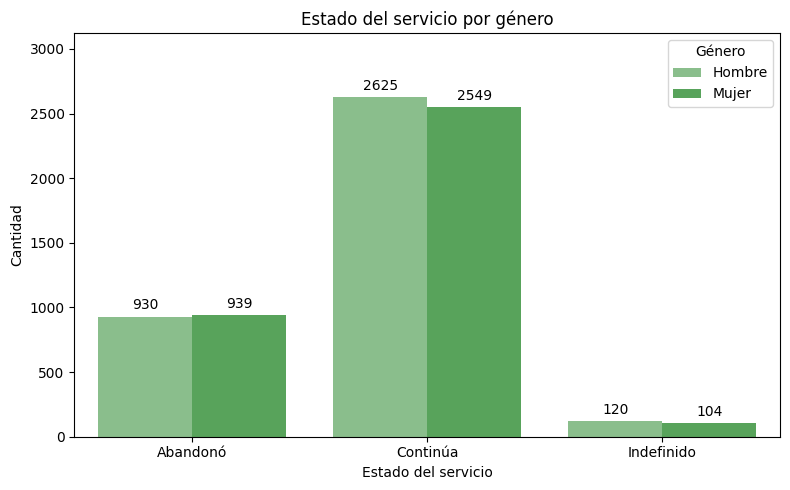

In [ ]:
# Agrupar los datos
conteo = datosNormalizadosFinal.groupby(['abandonó_del_servicio', 'género']).size().reset_index(name='cantidad')

# Mapear los valores categóricos
estado_map = {1: 'Abandonó', 2: 'Continúa', 3: 'Indefinido'}
genero_map = {1: 'Hombre', 2: 'Mujer'}
conteo['Estado'] = conteo['abandonó_del_servicio'].map(estado_map)
conteo['Género'] = conteo['género'].map(genero_map)

# Obtener valor máximo para ajustar el límite del eje y
valor_maximo = conteo['cantidad'].max()
limite_y = valor_maximo + 500

# Crear gráfico con colores personalizados
plt.figure(figsize=(8, 5))
grafico = sns.barplot(data=conteo, x='Estado', y='cantidad', hue='Género',
                     palette={'Hombre': '#81C784', 'Mujer': '#4CAF50'})  # ["#C8E6C9", "#81C784", "#4CAF50"]
# Añadir etiquetas con los valores
for barras in grafico.containers:
    grafico.bar_label(barras, padding=3)

# Establecer el límite del eje y
plt.ylim(0, limite_y)

# Ajustes finales
plt.title('Estado del servicio por género')
plt.ylabel('Cantidad')
plt.xlabel('Estado del servicio')
plt.tight_layout()
plt.show()

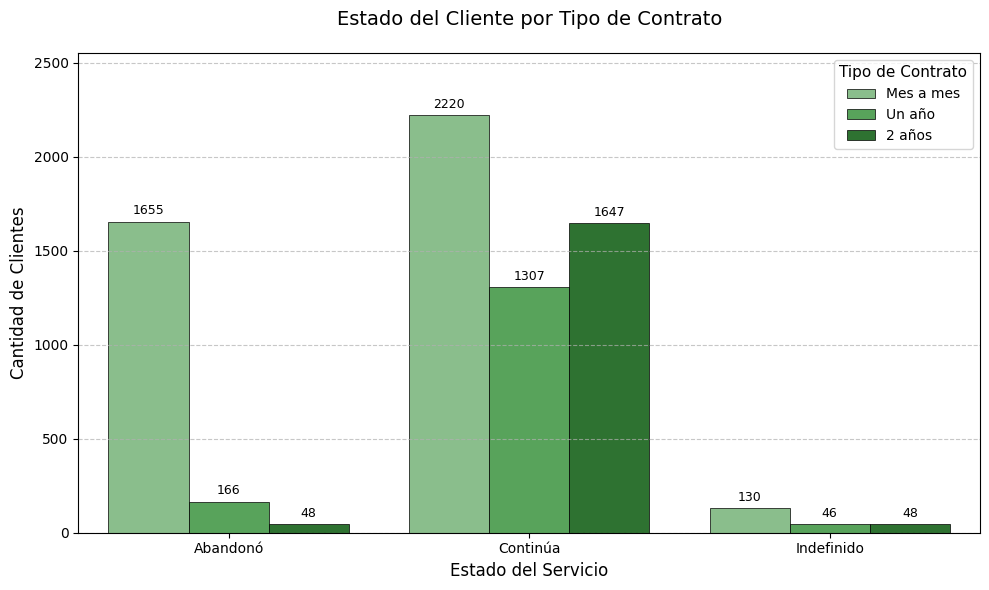

In [ ]:
# Agrupar los datos
conteo = datosNormalizadosFinal.groupby(['abandonó_del_servicio', 'tipo_de_contrato']).size().reset_index(name='cantidad')

# Mapear los valores categóricos (fixed the variable names to match)
estado_map = {1: 'Abandonó', 2: 'Continúa', 3: 'Indefinido'}
contrato_map = {1: 'Mes a mes', 2: 'Un año', 3: '2 años'}  # Changed variable name for clarity
conteo['Estado'] = conteo['abandonó_del_servicio'].map(estado_map)
conteo['Tipo de Contrato'] = conteo['tipo_de_contrato'].map(contrato_map)  # More descriptive column name

# Create plot with improved styling
plt.figure(figsize=(10, 6))
grafico = sns.barplot(data=conteo, x='Estado', y='cantidad', hue='Tipo de Contrato',
                     palette={'Mes a mes': '#81C784', 'Un año': '#4CAF50', '2 años': '#237d27'},
                     edgecolor='black', linewidth=0.5)  # Added borders for better visibility

# Add value labels with improved formatting
for container in grafico.containers:
    grafico.bar_label(container, fmt='%d', padding=3, fontsize=9)

# Adjust y-axis limit dynamically
plt.ylim(0, conteo['cantidad'].max() * 1.15)  # 15% padding instead of fixed 500

# Add titles and labels with improved formatting
plt.title('Estado del Cliente por Tipo de Contrato', fontsize=14, pad=20)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.xlabel('Estado del Servicio', fontsize=12)
plt.legend(title='Tipo de Contrato', title_fontsize=11)

# Improve grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

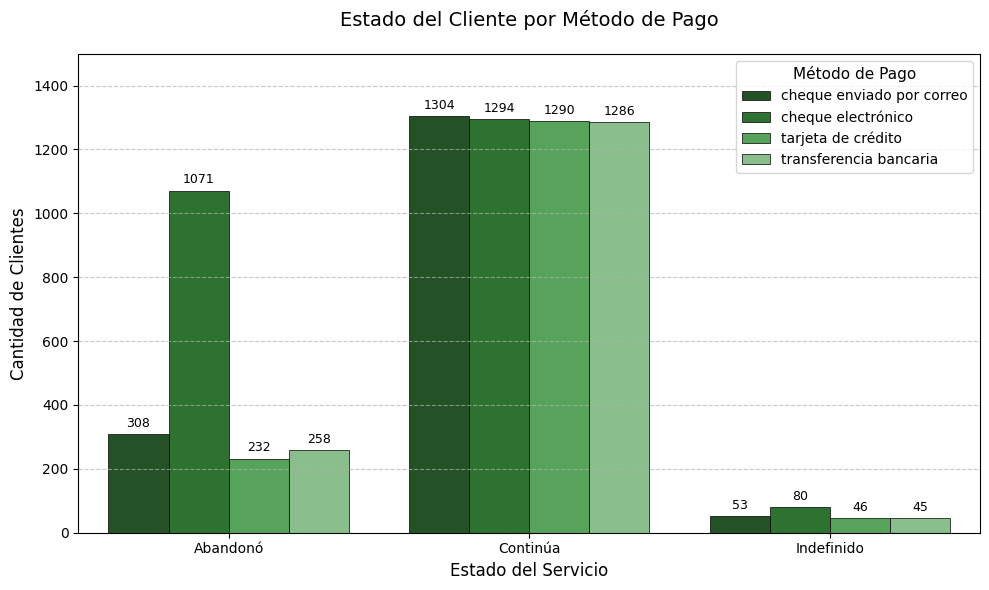

In [ ]:
# Agrupar los datos
conteo = datosNormalizadosFinal.groupby(['abandonó_del_servicio', 'método_de_pago']).size().reset_index(name='cantidad')

# Mapear los valores categóricos
estado_map = {1: 'Abandonó', 2: 'Continúa', 3: 'Indefinido'}
contrato_map = {1: 'cheque enviado por correo', 2: 'cheque electrónico', 3: 'tarjeta de crédito', 4: 'transferencia bancaria'}
conteo['Estado'] = conteo['abandonó_del_servicio'].map(estado_map)
conteo['Tipo de Contrato'] = conteo['método_de_pago'].map(contrato_map)

# Create plot with improved styling
plt.figure(figsize=(10, 6))
grafico = sns.barplot(data=conteo, x='Estado', y='cantidad', hue='Tipo de Contrato',
                     palette={
                         'cheque enviado por correo': '#1d5920',
                         'cheque electrónico': '#237d27',
                         'tarjeta de crédito': '#4CAF50',
                         'transferencia bancaria': '#81C784'
                     },
                     edgecolor='black', linewidth=0.5)

# Add value labels with improved formatting
for container in grafico.containers:
    grafico.bar_label(container, fmt='%d', padding=3, fontsize=9)

# Adjust y-axis limit dynamically
plt.ylim(0, conteo['cantidad'].max() * 1.15)

# Add titles and labels with improved formatting
plt.title('Estado del Cliente por Método de Pago', fontsize=14, pad=20)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.xlabel('Estado del Servicio', fontsize=12)
plt.legend(title='Método de Pago', title_fontsize=11)

# Improve grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

####

### <font color='#81C784' style='font-size: 30px;'>3.4 Conteo de evasión por variables numéricas
</font>

In [ ]:
datosNormalizadosFinal[['abandonó_del_servicio', 'pago_total']]

,abandonó_del_servicio,pago_total
0,2,593.30
1,2,542.40
2,1,280.85
3,1,1237.85
4,1,267.40
...,...,...
7262,2,742.90
7263,1,1873.70
7264,2,92.75
7265,2,4627.65


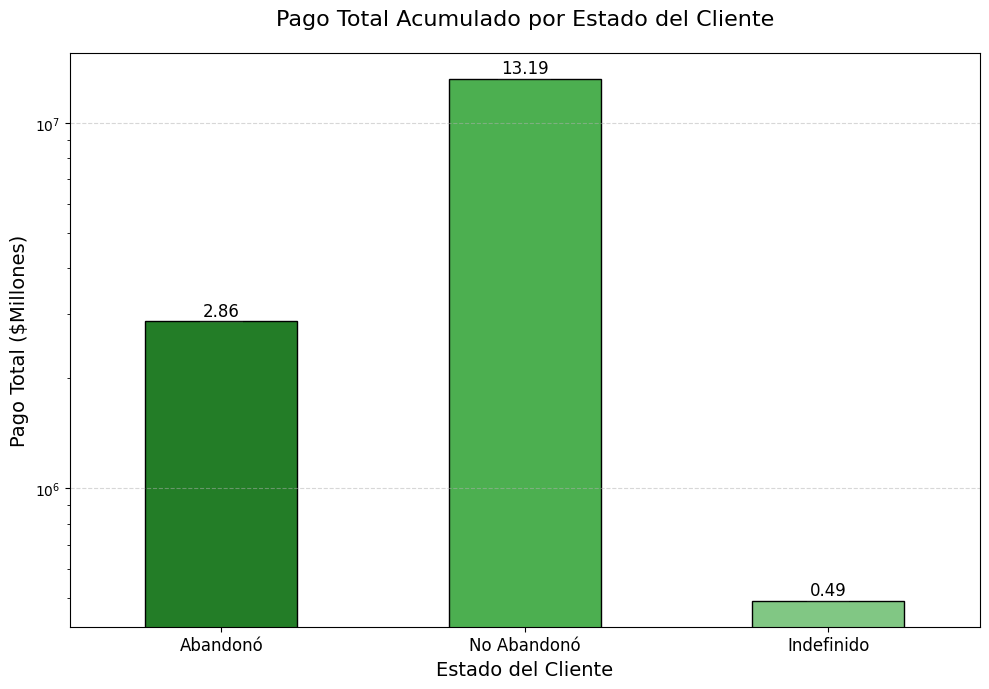

In [ ]:
# Agrupar y sumar los pagos (usando sum() como en tu código)
datos_agrupados = datosNormalizadosFinal.groupby('abandonó_del_servicio')['pago_total'].sum()

# Definir etiquetas correctamente
etiquetas = {
    1: "Abandonó",
    2: "No Abandonó",
    3: "Indefinido"}

# Crear el gráfico con tamaño ajustado para valores grandes
plt.figure(figsize=(10, 7))
ax = datos_agrupados.plot(
    kind='bar',
    color=['#237d27', '#4CAF50','#81C784'],
    edgecolor='black'
)

# Personalización mejorada
plt.title('Pago Total Acumulado por Estado del Cliente', fontsize=16, pad=20)
plt.xlabel('Estado del Cliente', fontsize=14)
plt.ylabel('Pago Total ($Millones)', fontsize=14)

# Corrección crítica: ticks deben coincidir con las posiciones reales (0,1,2 para 3 categorías)
plt.xticks(
    ticks=range(len(datos_agrupados)),  # [0, 1, 2] para 3 categorías
    labels=[etiquetas[i] for i in datos_agrupados.index],
    rotation=0,
    fontsize=12
)

# Formateo de valores grandes en millones para mejor legibilidad
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.,
        height * 1.01,  # 1% arriba de la barra para valores grandes
        f"{height/1e6:.2f}",  # Mostrar en millones
        ha='center',
        va='bottom',
        fontsize=12,
        bbox=dict(facecolor='white', alpha=0.05, edgecolor='none', pad=2)
    )

# Ajustes finales
plt.yscale('log')  # Escala logarítmica para mejor visualización de grandes diferencias
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

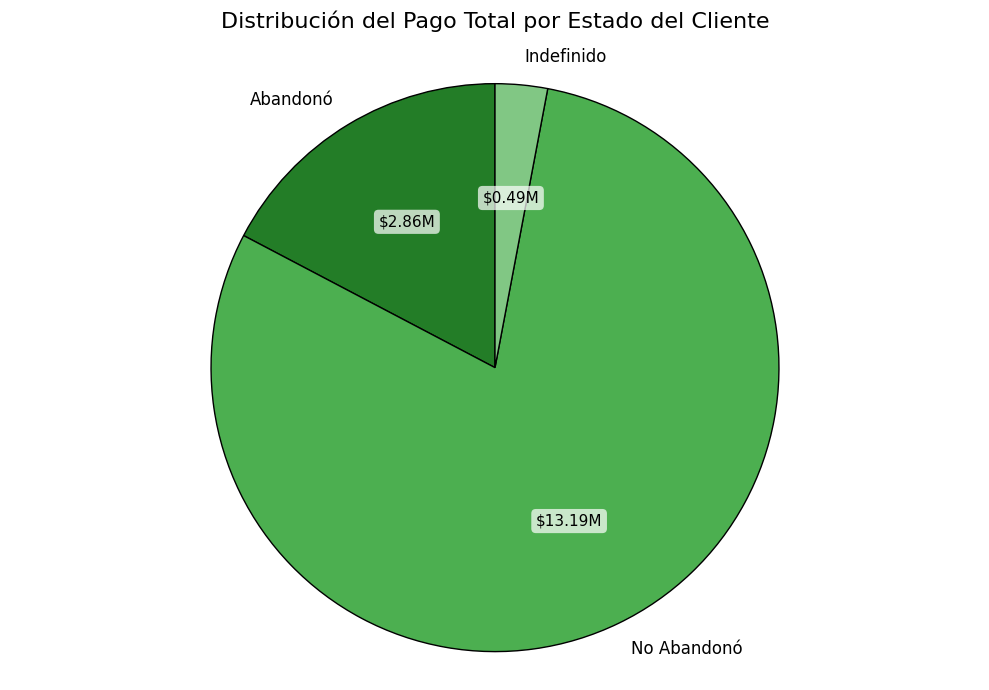

In [ ]:
# Gráfico de torta
plt.figure(figsize=(10, 7))

# Crear el pie chart
patches, texts, autotexts = plt.pie(
    datos_agrupados,
    labels=[etiquetas[i] for i in datos_agrupados.index],
    colors=['#237d27','#4CAF50','#81C784'],
    autopct=lambda p: f"${p * sum(datos_agrupados)/100/1e6:.2f}M",
    startangle=90,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    textprops={'fontsize': 12}
)

# Personalización
plt.title('Distribución del Pago Total por Estado del Cliente', fontsize=16, pad=20)
plt.axis('equal')  # Para que el pie sea circular

# Mejorar las etiquetas de porcentaje
for autotext in autotexts:
    autotext.set_fontsize(11)
    autotext.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()

In [ ]:
datosNormalizadosFinal[['abandonó_del_servicio', 'pagos_mensuales']]

,abandonó_del_servicio,pagos_mensuales
0,2,65.60
1,2,59.90
2,1,73.90
3,1,98.00
4,1,83.90
...,...,...
7262,2,55.15
7263,1,85.10
7264,2,50.30
7265,2,67.85


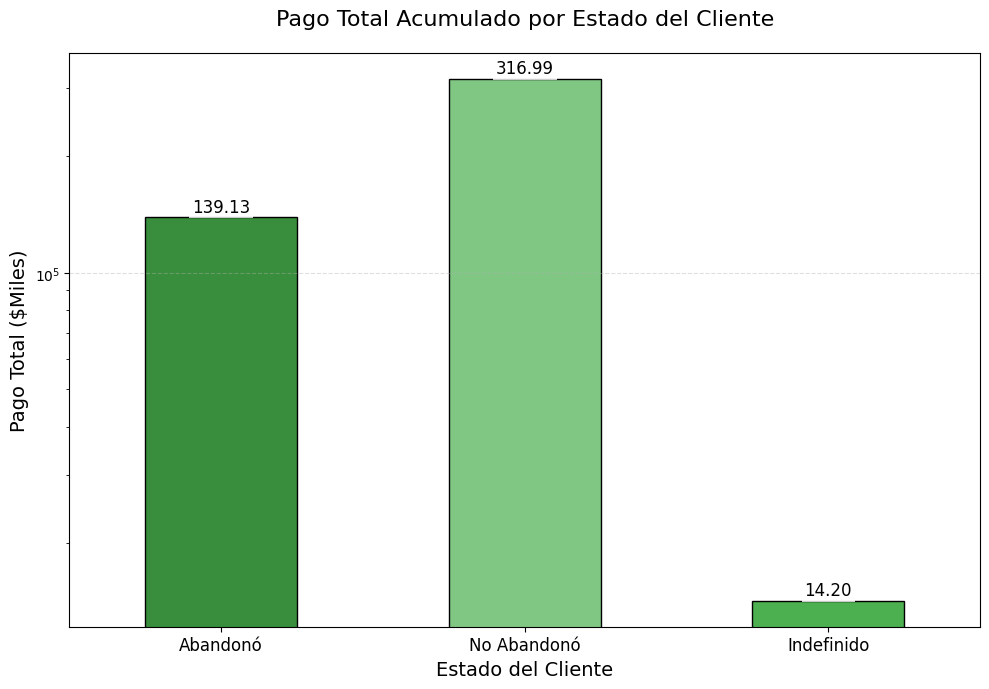

In [ ]:
# Agrupar y sumar los pagos
datos_agrupados = datosNormalizadosFinal.groupby('abandonó_del_servicio')['pagos_mensuales'].sum()

# Definir etiquetas correctamente
etiquetas = {
    1: "Abandonó",
    2: "No Abandonó",
    3: "Indefinido"}

# Crear el gráfico con tamaño ajustado para valores grandes
plt.figure(figsize=(10, 7))
ax = datos_agrupados.plot(
    kind='bar',
    color=['#388E3C', '#81C784', '#4CAF50'],
    edgecolor='black'
)

# Personalización mejorada
plt.title('Pago Total Acumulado por Estado del Cliente', fontsize=16, pad=20)
plt.xlabel('Estado del Cliente', fontsize=14)
plt.ylabel('Pago Total ($Miles)', fontsize=14)

# Corrección crítica: ticks deben coincidir con las posiciones reales (0,1,2 para 3 categorías)
plt.xticks(
    ticks=range(len(datos_agrupados)),  # [0, 1, 2] para 3 categorías
    labels=[etiquetas[i] for i in datos_agrupados.index],
    rotation=0,
    fontsize=12
)

# Formateo de valores grandes en millones para mejor legibilidad
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.,
        height * 1.01,  # 1% arriba de la barra para valores grandes
        f"{height/1e3:.2f}",  # Mostrar en millones
        ha='center',
        va='bottom',
        fontsize=12,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2)
    )

# Ajustes finales
plt.yscale('log')  # Escala logarítmica para mejor visualización de grandes diferencias
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

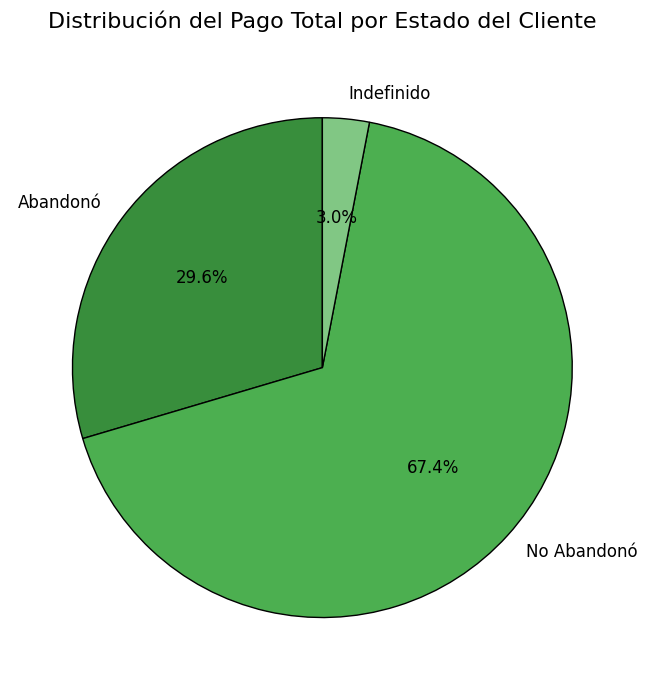

In [ ]:
# Agrupar y sumar los pagos
datos_agrupados = datosNormalizadosFinal.groupby('abandonó_del_servicio')['pagos_mensuales'].sum()

# Definir etiquetas correctamente
etiquetas = {
    1: "Abandonó",
    2: "No Abandonó",
    3: "Indefinido"}

# Crear el gráfico circular con tamaño ajustado
plt.figure(figsize=(10, 7))

# Crear el pie chart
plt.pie(
    datos_agrupados,
    labels=[etiquetas[i] for i in datos_agrupados.index],
    autopct='%1.1f%%',  # Mostrar porcentajes
    startangle=90,  # Iniciar desde arriba
    colors=['#388E3C', '#4CAF50','#81C784'],  # Mismos colores que el original
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Borde negro como en el original
    textprops={'fontsize': 12}  # Tamaño de fuente
)

# Personalización mejorada
plt.title('Distribución del Pago Total por Estado del Cliente', fontsize=16, pad=20)

# Ajustes finales
plt.tight_layout()
plt.show()

In [ ]:
datosNormalizadosFinal['meses_permanencia'].sample(7)

,meses_permanencia
2369,32
6826,48
2395,4
5743,2
821,72
803,1
7234,15


### <font color='#81C784' style='font-size: 30px;'>3.5 Años de permanencia Hombres y Mujeres
</font>


In [ ]:
datosNormalizadosFinal['años_permanencia'] = datosNormalizadosFinal['meses_permanencia'] // 12+1
#print(datosNormalizadosFinal['años_permanencia'])

In [ ]:
# Mapear valores de género
datosNormalizadosFinal['género'] = datosNormalizadosFinal['género'].map({1: 'Hombres', 2: 'Mujeres'})

# Crear nueva columna con años de permanencia
datosNormalizadosFinal['años_permanencia'] = datosNormalizadosFinal['meses_permanencia'] // 11 + 1
datosNormalizadosFinal['años_permanencia'] = datosNormalizadosFinal['años_permanencia'].astype(str)

# Crear tabla cruzada
tabla = pd.crosstab(datosNormalizadosFinal['años_permanencia'], datosNormalizadosFinal['género'])

In [ ]:
# Crear tabla cruzada y ordenar (tu código existente)
tabla = pd.crosstab(datosNormalizadosFinal['años_permanencia'], datosNormalizadosFinal['género'])
tabla_reset = tabla.reset_index()
tabla_reset['orden'] = tabla_reset['años_permanencia'].str.extract('(\d+)')[0].astype(int)
tabla_ordenada = tabla_reset.sort_values('orden').drop(columns='orden')
tabla_ordenada.set_index('años_permanencia', inplace=True)

In [ ]:
tabla_ordenada

género,Hombres,Mujeres
años_permanencia,,
1,1041,1004
2,481,509
3,449,412
4,361,371
5,382,379
6,405,408
7,556,509


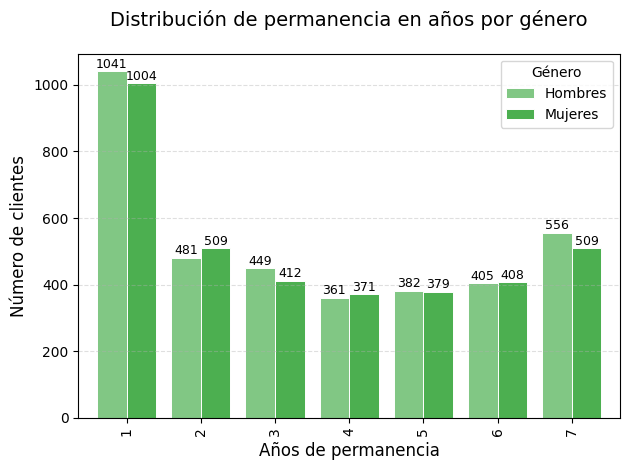

In [ ]:
# Graficar con colores personalizados y mejor estilo
#plt.figure(figsize=(25, 16))
ax = tabla_ordenada.plot(kind='bar', width=0.8,
                        color=['#81C784', '#4CAF50'],
                        edgecolor='white', linewidth=0.7)

# Personalización adicional
plt.title('Distribución de permanencia en años por género', fontsize=14, pad=20)
plt.xlabel('Años de permanencia', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)
plt.legend(title='Género', frameon=True, facecolor='white')
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Añadir etiquetas de valor encima de las barras
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=9)

plt.tight_layout()
plt.show()
#print(tabla_ordenada)

In [ ]:
# Verificar tipos de datos
print(datosNormalizadosFinal.dtypes)

# Obtener columnas no numéricas
columnas_no_numericas = datosNormalizadosFinal.select_dtypes(exclude=['number']).columns
print("Columnas no numéricas:", columnas_no_numericas.tolist())

Id_Cliente                     object
abandonó_del_servicio           int64
género                         object
adulto_mayor                    int64
estado_civil                    int64
dependientes                    int64
meses_permanencia               int64
servicio_telefónico             int64
líneas_telefónicas              int64
servicio_internet               int64
seguridad_en_línea              int64
copia_online                    int64
protección_de_dispositivos      int64
soporte_técnico                 int64
TV_en_línea                     int64
películas_en_línea              int64
tipo_de_contrato                int64
facturación_digital             int64
método_de_pago                  int64
pagos_mensuales               float64
pago_total                    float64
años_permanencia               object
dtype: object
Columnas no numéricas: ['Id_Cliente', 'género', 'años_permanencia']


In [ ]:
datos_numericos = datosNormalizadosFinal.drop(columns=['Id_Cliente', 'género', 'años_permanencia'])

In [ ]:
datosNormalizadosFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id_Cliente                  7267 non-null   object 
 1   abandonó_del_servicio       7267 non-null   int64  
 2   género                      7267 non-null   object 
 3   adulto_mayor                7267 non-null   int64  
 4   estado_civil                7267 non-null   int64  
 5   dependientes                7267 non-null   int64  
 6   meses_permanencia           7267 non-null   int64  
 7   servicio_telefónico         7267 non-null   int64  
 8   líneas_telefónicas          7267 non-null   int64  
 9   servicio_internet           7267 non-null   int64  
 10  seguridad_en_línea          7267 non-null   int64  
 11  copia_online                7267 non-null   int64  
 12  protección_de_dispositivos  7267 non-null   int64  
 13  soporte_técnico             7267 

In [ ]:
corr = datos_numericos.corr(method='spearman')

In [ ]:
correlacion_abandono = corr['abandonó_del_servicio'].sort_values(key=abs, ascending=False)
print("Variables más correlacionadas (absoluto):")
print(correlacion_abandono.head(10))

Variables más correlacionadas (absoluto):
abandonó_del_servicio    1.000000
tipo_de_contrato         0.365862
meses_permanencia        0.331305
pago_total               0.205302
pagos_mensuales         -0.170793
facturación_digital      0.170402
dependientes            -0.151982
TV_en_línea              0.142024
estado_civil            -0.141588
películas_en_línea       0.140228
Name: abandonó_del_servicio, dtype: float64


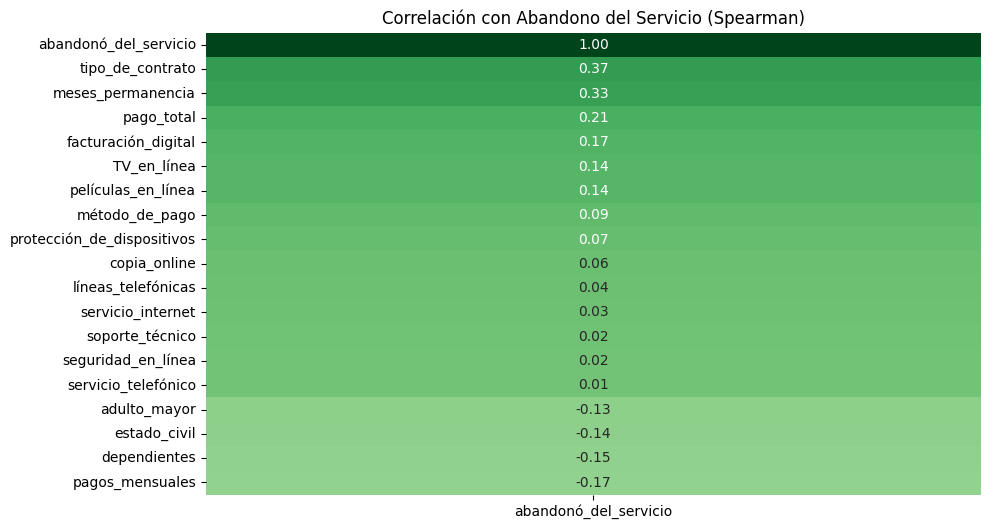

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr[['abandonó_del_servicio']].sort_values(by='abandonó_del_servicio', ascending=False),
            annot=True, cmap='Greens', center=0, fmt=".2f", cbar=False)
plt.title("Correlación con Abandono del Servicio (Spearman)")
plt.show()

Top 5 variables más influyentes en el abandono:
abandonó_del_servicio    1.000000
tipo_de_contrato         0.365862
meses_permanencia        0.331305
pago_total               0.205302
pagos_mensuales          0.170793
facturación_digital      0.170402
dependientes             0.151982
TV_en_línea              0.142024
estado_civil             0.141588
películas_en_línea       0.140228
Name: abandonó_del_servicio, dtype: float64


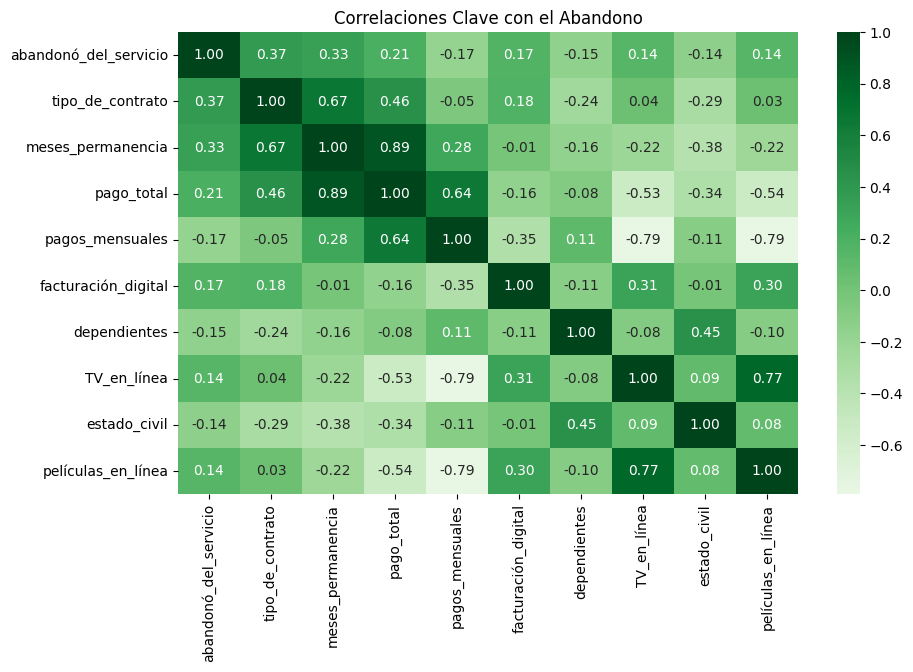

In [ ]:
# 1. Eliminar columnas no numéricas
datos_numericos = datosNormalizadosFinal.drop(columns=['Id_Cliente', 'género', 'años_permanencia'])

# 2. Calcular correlación de Spearman
corr = datos_numericos.corr(method='spearman')

# 3. Top 5 variables con mayor correlación (absoluta)
top_correlaciones = corr['abandonó_del_servicio'].abs().sort_values(ascending=False).head(10)
print("Top 5 variables más influyentes en el abandono:")
print(top_correlaciones)

# 4. Heatmap enfocado
plt.figure(figsize=(10, 6))
sns.heatmap(corr[top_correlaciones.index].loc[top_correlaciones.index],
            annot=True, cmap='Greens', center=0, fmt=".2f")
plt.title("Correlaciones Clave con el Abandono")
plt.show()

In [ ]:
corrPearson = datos_numericos.corr(method='pearson')

In [ ]:
correlacionPearsonTotal = corrPearson['abandonó_del_servicio'].sort_values(key=abs, ascending=False)
print("Variables más correlacionadas (absoluto):")
print(correlacionPearsonTotal.head(5))

Variables más correlacionadas (absoluto):
abandonó_del_servicio    1.000000
tipo_de_contrato         0.343847
meses_permanencia        0.307073
pagos_mensuales         -0.173298
pago_total               0.171432
Name: abandonó_del_servicio, dtype: float64


Top 5 variables más influyentes en el abandono:
abandonó_del_servicio    1.000000
tipo_de_contrato         0.343847
meses_permanencia        0.307073
pagos_mensuales          0.173298
pago_total               0.171432
Name: abandonó_del_servicio, dtype: float64


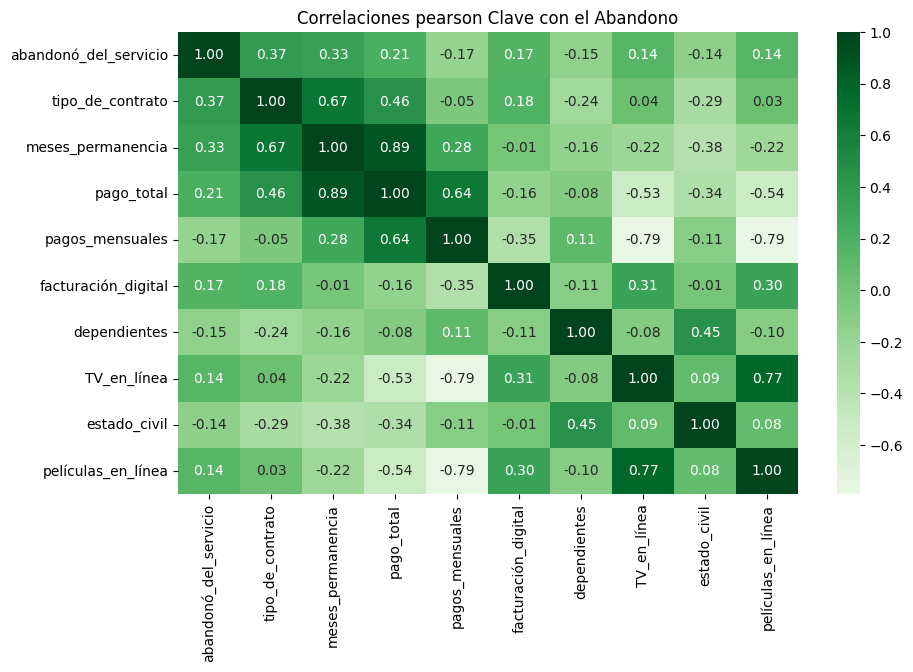

In [ ]:
# 1. Eliminar columnas no numéricas
datos_numericos = datosNormalizadosFinal.drop(columns=['Id_Cliente', 'género', 'años_permanencia'])

# 2. Calcular correlación de Spearman
corrPearson = datos_numericos.corr(method='pearson')

# 3. Top 5 variables con mayor correlación (absoluta)
top_correlacionesPearson = corrPearson['abandonó_del_servicio'].abs().sort_values(ascending=False).head(5)
print("Top 5 variables más influyentes en el abandono:")
print(top_correlacionesPearson)

# 4. Heatmap enfocado
plt.figure(figsize=(10, 6))
sns.heatmap(corr[top_correlaciones.index].loc[top_correlaciones.index],
            annot=True, cmap='Greens', center=0, fmt=".2f")
plt.title("Correlaciones pearson Clave con el Abandono")
plt.show()

In [ ]:
corrkendall = datos_numericos.corr(method='kendall')

In [ ]:
correlacionKenadallTop= corrkendall['abandonó_del_servicio'].sort_values(key=abs, ascending=False)
print("Variables más correlacionadas (absoluto):")
print(correlacionKenadallTop.head(5))

Variables más correlacionadas (absoluto):
abandonó_del_servicio    1.000000
tipo_de_contrato         0.343739
meses_permanencia        0.269919
facturación_digital      0.168129
pago_total               0.165474
Name: abandonó_del_servicio, dtype: float64


Top 5 variables más influyentes en el abandono:
abandonó_del_servicio    1.000000
tipo_de_contrato         0.343847
meses_permanencia        0.307073
pagos_mensuales          0.173298
pago_total               0.171432
Name: abandonó_del_servicio, dtype: float64


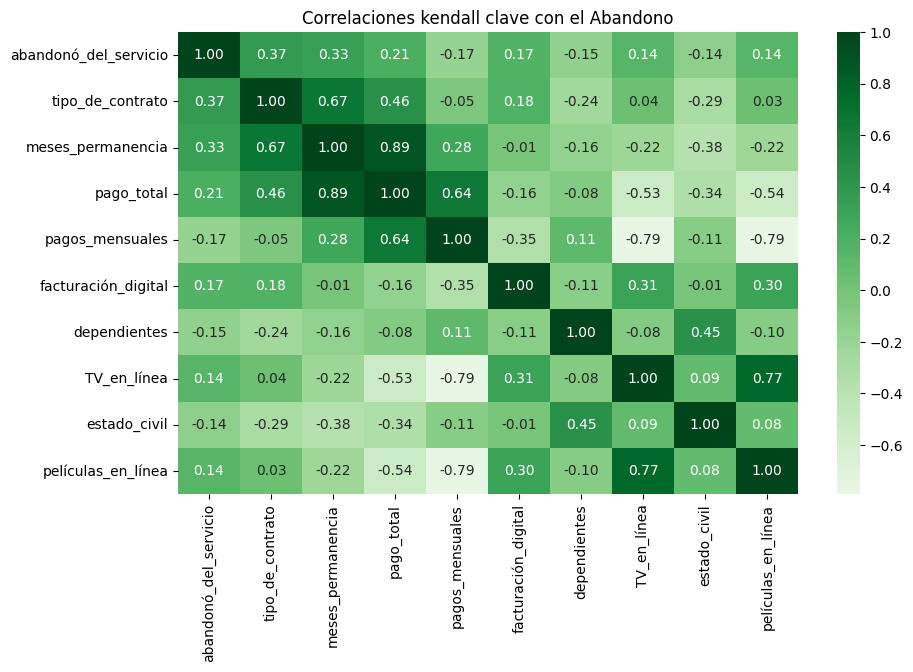

In [ ]:
# 1. Eliminar columnas no numéricas
datos_numericos = datosNormalizadosFinal.drop(columns=['Id_Cliente', 'género', 'años_permanencia'])

# 2. Calcular correlación de kendall
corrkendallTop = datos_numericos.corr(method='pearson')

# 3. Top 5 variables con mayor correlación (absoluta)
top_correlacioneskendallTop = corrkendallTop['abandonó_del_servicio'].abs().sort_values(ascending=False).head(5)
print("Top 5 variables más influyentes en el abandono:")
print(top_correlacioneskendallTop)

# 4. Heatmap enfocado
plt.figure(figsize=(10, 6))
sns.heatmap(corr[top_correlaciones.index].loc[top_correlaciones.index],
            annot=True, cmap='Greens', center=0, fmt=".2f")
plt.title("Correlaciones kendall clave con el Abandono")
plt.show()

# <font color='#50C878' style='font-size: 30px;'>4.Informe final</font>

# Análisis Exploratorio de Datos (EDA) para el Proyecto "evasión de Clientes de Clientes" en Telecom X

El análisis de los datos de Telecom X revela que aproximadamente el 25.7% de los clientes han abandonado el servicio ("evasión de Clientes"), mientras que el 71.2% son clientes activos. Los factores más correlacionados con el abandono incluyen el tipo de contrato (0.37), meses de permanencia (0.33) y pago total (0.21). Los clientes con contratos mensuales muestran mayor propensión al abandono, mientras que aquellos con contratos a más largo plazo (1-2 años) tienen menor rotación.

## 1. Distribución General de Clientes

<img src='1-EstadoClientesBarras.png' width='100%'>

<img src='2-EstadoClienteCirculo.png' width='100%'>


- **Total de clientes analizados**: 7,267 (5,174 clientes activos + 1,869 abandonos + 224 sin análisis)
- **Distribución porcentual**:
  - Clientes activos: 71.20%
  - Abandonos: 25.72%
  - Sin análisis: 3.08%

**observación clave**: Casi 1 de cada 4 clientes abandona el servicio, lo que representa una oportunidad significativa para mejorar la retención.



## 2. Análisis por Género

<img src='3-EstadoServicioGenero.png' width='100%'>

- **Distribución de género**:
  - Hombres: 2,625 activos, 930 abandonos, 120 indefinidos
  - Mujeres: 2,549 activos, 939 abandonos, 104 indefinidos

**observación clave**: No hay diferencias significativas en las tasas de abandono entre géneros (26.2% hombres vs. 26.9% mujeres), lo que sugiere que las estrategias de retención no necesitan ser diferenciadas por género.

## 3. Análisis por Tipo de Contrato


<img src='4-EstadoTipoContrato.png' width='100%'>

Los datos muestran que:
- Los contratos mes a mes tienen la mayor tasa de abandono
- Los contratos a 1 y 2 años tienen tasas de retención significativamente mayores

**Recomendación**: Incentivar la conversión de clientes a contratos de más largo plazo podría reducir significativamente el evasión de Clientes.



## 4. Análisis Financiero


<img src='6-PagoTotalAcumuladoPorEstadoCliente.png' width='100%'>

<img src='7-DistribucionTotalPagoClientes.png' width='100%'>

<img src='8-PagoTotalAcumuladoEstadoCliente.png' width='100%'>


<img src='9-distribucionPagoTotalEstadoCliente.png' width='100%'>

- Los clientes que abandonan representan aproximadamente el 29.6% del pago total
- Los clientes activos representan el 67.4% del pago total
- El pago total acumulado de clientes que no abandonan es significativamente mayor ($139.13M vs $14.20M para abandonos)

**observación clave**: Retener clientes no solo reduce el evasión de Clientes, sino que tiene un impacto financiero significativo en los ingresos totales.



## 5. Permanencia de Clientes

<img src='10-DistribucionPermanenciaAñosGenero.png' width='100%'>

Los datos muestran que:
- Hay una distribución similar de permanencia entre hombres y mujeres
- La mayoría de los clientes tienen entre 1-4 años de permanencia

## 6. Correlaciones con el Abandono

<img src='11-CancelacionAbandonoServico(Supearman).png' width='100%'>

<img src='10-DistribucionPermanenciaAñosGenero.png' width='100%'>

| Top 5 variables más influyentes en el abandono: |          |
| ----------------------------------------------- | -------- |
| abandonó_del_servicio                           | 1.000000 |
| tipo_de_contrato                                | 0.343847 |
| meses_permanencia                               | 0.307073 |
| pagos_mensuales                                 | 0.173298 |
| pago_total                                      | 0.171432 |
   **Name:** abandonó_del_servicio, dtype: float64



<img src='12-CorrelacionAbandono.png' width='100%'>

| Top 5 variables más influyentes en el abandono: |          |
| ----------------------------------------------- | -------- |
| abandonó_del_servicio                           | 1.000000 |
| tipo_de_contrato                                | 0.343847 |
| meses_permanencia                               | 0.307073 |
| pagos_mensuales                                 | 0.173298 |
| pago_total                                      | 0.171432 |
Name: abandonó_del_servicio, dtype: float64

<img src='13-CorrelacionClaveConAbandono.png' width='100%'>


| Top 5 variables más influyentes en el abandono: |          |
| ----------------------------------------------- | -------- |
| abandonó_del_servicio                           | 1.000000 |
| tipo_de_contrato                                | 0.343847 |
| meses_permanencia                               | 0.307073 |
| pagos_mensuales                                 | 0.173298 |
| pago_total                                      | 0.171432 |
Name: abandonó_del_servicio, dtype: float64

<img src='14-CorrelacionClaveConAbandono.png' width='100%'>


**Factores con mayor correlación positiva con el abandono**:
1. Tipo de contrato (0.37)
2. Meses de permanencia (0.33)
3. Pago total (0.21)
4. Facturación digital (0.17)

**Factores con correlación negativa**:
1. Pagos mensuales (-0.17)
2. Dependientes (-0.15)
3. Estado civil (-0.14)

**Hallazgos clave**:
- Los contratos a corto plazo están fuertemente asociados con mayor abandono
- Los clientes con más tiempo en el servicio tienen mayor probabilidad de abandonar
- La facturación digital está ligeramente asociada con mayor abandono
- Los clientes con dependientes y aquellos casados tienen menor probabilidad de abandonar



## Recomendaciones Estratégicas

1. **Programas de fidelización**: Implementar incentivos para que los clientes con contratos mensuales migren a contratos anuales o bianuales.

2. **Intervenciones tempranas**: Desarrollar estrategias de retención específicas para clientes que alcanzan los 6-12 meses de permanencia, cuando el riesgo de abandono aumenta.

3. **Optimización de facturación digital**: Investigar por qué la facturación digital correlaciona con mayor abandono y mejorar la experiencia del usuario.

4. **Programas familiares**: Desarrollar ofertas para clientes con dependientes, ya que muestran menor propensión al abandono.

5. **Monitoreo continuo**: Establecer un sistema de alerta temprana basado en los factores de riesgo identificados para intervenir proactivamente.

## Próximos Pasos para el Equipo de Data Science

1. Desarrollar un modelo predictivo de evasión de Clientes utilizando las variables identificadas como más correlacionadas.
2. Segmentar la base de clientes según riesgo de abandono para estrategias personalizadas.
3. Implementar pruebas A/B para las estrategias de retención propuestas.
4. Establecer métricas claras para medir el impacto de las iniciativas de reducción de evasión de Clientes.

